# Modules and Packages

A good scientific calculator has all sorts of built-in functions like ```sin```, ```ln```, ```sqrt```.  These are also available to you in Python via a 
**package** known as ```numpy``` (see also ```math```).   Modules and packages are libraries for Python code. You will use them constantly to use existing code. As a more experienced program you can write your own modules and packages to re-use your code. 


## Modules 

A modules is a file with Python code with the .py suffix. It typically contains:
- variable assignments
- function definitions
- classes/objects

i.e. code that defines things, but that does not immediately execute (although nothing prevents you from putting code that can execute in such a file).  In simple terms, we can consider a module to be a file that contains a set of variables, functions, or classes that you want to include in your application. 

The module name is the file name with the .py suffix removed. It can be **imported** into another Python program using the ```import``` statement.
```python 
import module_name
```

where module_name.py would be the python file for the module. 

For example you can find the constants.py python file in this lectures directory. It contains the following simple block of code: 
```python
# constants.py: Module containing some fundamental constants constants.py

pi = 3.1415926535897932384626
h = 6.62607015e-34
c = 299792458
```

In [1]:
import constants
two_pi = 2*constants.pi
hbar = constants.h/two_pi
print('hbar = {:.9e}'.format(hbar))

hbar = 1.054571818e-34


The contents of a module are accessed with the “dot” operator, e.g, constants.pi.

Other ways to import: 

In [1]:
# directly import specific variables
from constants import h, pi
hbar = h / (2*pi)
print('hbar = {:.9e}'.format(hbar))

# aliasing or a name change
import constants as c
hbar = c.h / (2*c.pi)
print('hbar = {:.9e}'.format(hbar))

hbar = 1.054571818e-34
hbar = 1.054571818e-34


## Packages


A Python package is a collection of modules that are distributed together. 
- A package modularizes the modules. 
- Modules in a package are also accessed with the dot operator
- Packages become important when working on larger projects. Many external Python libraries are distributed as packages. 

Like modules, packages need to be imported into your code using the command ```import```.  There are three very useful Python packages in particular which we will use in this course, and which in fact are the three most widely used in the sciences:  ```numpy```, ```scipy```, and ```matplotlib```.  For example, consider scipy which we will use in this course for several different applications: 

In [2]:
import scipy
dir(scipy)

['LowLevelCallable',
 '__version__',
 'cluster',
 'constants',
 'datasets',
 'fft',
 'fftpack',
 'integrate',
 'interpolate',
 'io',
 'linalg',
 'misc',
 'ndimage',
 'odr',
 'optimize',
 'show_config',
 'signal',
 'sparse',
 'spatial',
 'special',
 'stats',
 'test']

Above I used the dir() function which is part of the [Python Standard Library](http://docs.python.org/3/library), to access the **attributes** of the ```scipy``` package. Note that I can achieve the same thing in a Jupyter notebook code cell or in the Ipython shell via the `<TAB>` key, i.e. 

```python
In [3]: scipy.<TAB>
               cluster          integrate        misc             signal           test            
               constants        interpolate      ndimage          sparse                           
               datasets         io               odr              spatial                          
               fft              linalg           optimize         special                          
               fftpack          LowLevelCallable show_config()    stats                            
```

Note that scipy has a module known as constants, I can access it via the dot operator.

In [10]:
print('Scipy h = {:.9e}'.format(scipy.constants.Planck))
print('My h= {:.9e}'.format(constants.h))

Scipy h = 6.626070150e-34
My h= 6.626070150e-34


In a Jupyter notebook, you can access help using either the help function or the question mark, ```?``` key

In [6]:
help(scipy.integrate)

Help on package scipy.integrate in scipy:

NAME
    scipy.integrate

DESCRIPTION
    Integration and ODEs (:mod:`scipy.integrate`)
    
    .. currentmodule:: scipy.integrate
    
    Integrating functions, given function object
    
    .. autosummary::
       :toctree: generated/
    
       quad          -- General purpose integration
       quad_vec      -- General purpose integration of vector-valued functions
       dblquad       -- General purpose double integration
       tplquad       -- General purpose triple integration
       nquad         -- General purpose N-D integration
       fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
       quadrature    -- Integrate with given tolerance using Gaussian quadrature
       romberg       -- Integrate func using Romberg integration
       newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
       qmc_quad      -- N-D integration using Quasi-Monte Carlo quadrature
       IntegrationWarnin

In [7]:
scipy.special.jv?


Call signature:  scipy.special.jv(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'jv'>
File:            ~/miniconda3/envs/Phys29/lib/python3.11/site-packages/numpy/__init__.py
Docstring:      
jv(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

jv(v, z, out=None)

Bessel function of the first kind of real order and complex argument.

Parameters
----------
v : array_like
    Order (float).
z : array_like
    Argument (float or complex).
out : ndarray, optional
    Optional output array for the function values

Returns
-------
J : scalar or ndarray
    Value of the Bessel function, :math:`J_v(z)`.

See also
--------
jve : :math:`J_v` with leading exponential behavior stripped off.
spherical_jn : spherical Bessel functions.
j0 : faster version of this function for order 0.
j1 : faster version of this function for order 1.

Notes
-----
For positive `v` values, the computation is carried out using the AMOS
[1]

In this example, the constants.py module that I imported above does not overwrite (or “shadow”) the scipy.constants module (or vice versa): they live in what are called different **namespaces**. Packages organize modules so that name collisions are avoided.

Below I provide an example that combines the use of the ```numpy```, ```scipy```, and ```matplotlib``` packages. 

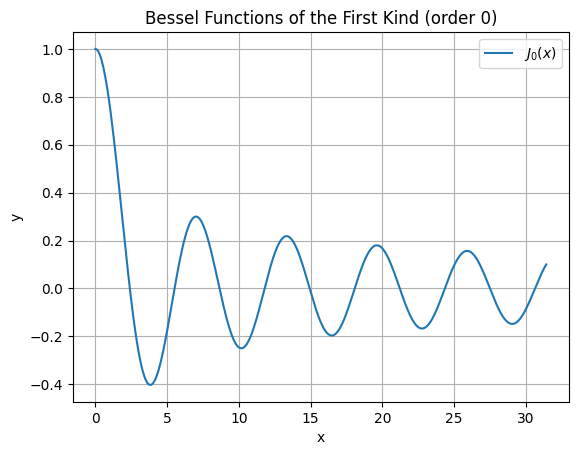

In [13]:
import numpy as np
from scipy.special import jv   # jv is the function for the Bessel function of the first kind
import matplotlib.pyplot as plt

x = np.linspace(0, 10*np.pi, 500) # Set up a linearly spaced domain between 0 and 30 with 500 points. 
y = jv(0, x)   # Compute the Bessel function of order 0 on this domain, i.e. y = J_0(x)
# Make the plot
plt.plot(x, y, label=r'$J_{}(x)$'.format(0))
plt.title('Bessel Functions of the First Kind (order 0)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

Note that I have imported the ```numpy``` module and called it ```np```.  This just saves me typing out the full word ```numpy``` all the time, and indeed  ```np``` is a VERY common shorthand.  ```numpy``` has a lot of useful functions, including the trig functions and
their inverses (e.g. ```np.arcsin()```), hyperbolic trig functions (e.g. ```np.sinh()```), the exponential function ```np.exp()```, logarithms (```np.log()``` is $\ln$, the natural logarithm to base $e$ - if you want log base ten use ```np.log10()```), and the square root function ```np.sqrt()```.  It also has a number of useful mathematical constants, i.e. I used ```np.pi``` in the example above to access the constant $\pi$. 

I also imported the ```scipy``` module so that I could access the Bessel functions in the ```scipy.special``` sub-module. In other words the ```scipy``` package is actually a collection of ```.py``` files arranged in a directory hierarchy, and so you can think of ```scipy.special``` as being the path to a file in that directory structure.  Finally, I used the statement ```import matplotlib.pyplot as plt``` to import the ```pyplot``` function (abbreviated as ```plt``` as is the standard) from the ```matplotlib.pyplot``` sub-module. 

Finally, take note of how I provided comments in my code via the ```#```, explaining the logic behind my reasoning. 
